In [1]:
"""
Autores: Ariel da Silva
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [2]:
abalone_dataset = pd.read_csv('archive/abalone.csv')
abalone_dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone_dataset['Age'] = abalone_dataset['Rings'].apply(lambda x: x +1.5)
abalone_dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [4]:
abalone_dataset = abalone_dataset[abalone_dataset['Height'] != 0]  #need to drop these rows.
abalone_dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


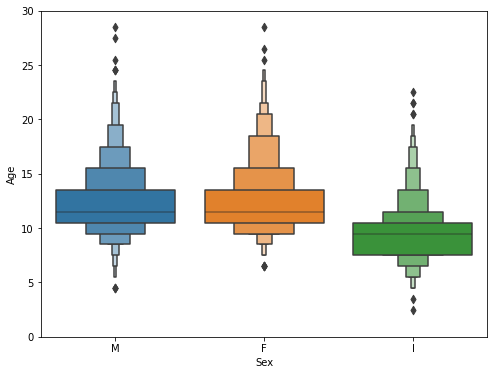

In [5]:
#categorical features
temp = pd.concat([abalone_dataset['Age'], abalone_dataset['Sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Age", data=abalone_dataset)
fig.axis(ymin=0, ymax=30);

C:\Users\jonatas\anaconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


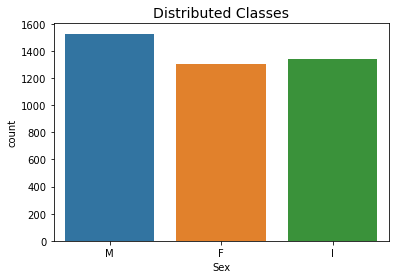

In [6]:
sns.countplot('Sex', data=abalone_dataset)
plt.title('Distributed Classes', fontsize=14)
plt.show()

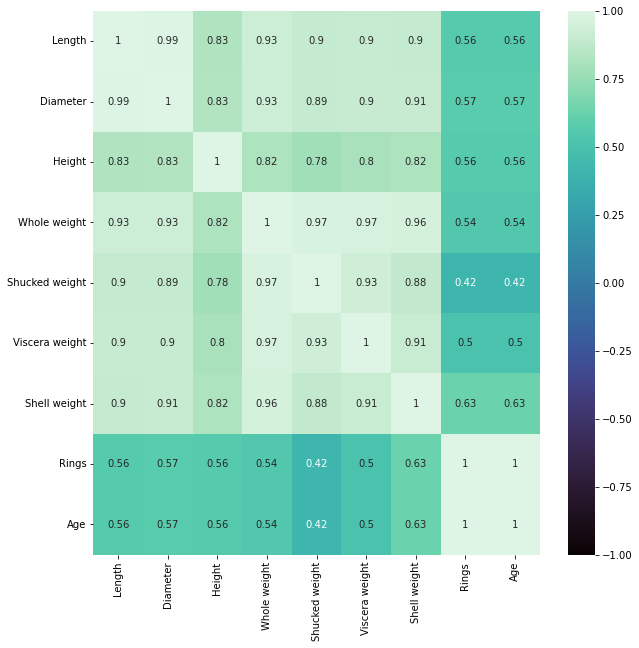

In [7]:
corr = abalone_dataset.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

In [8]:
abalone_dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

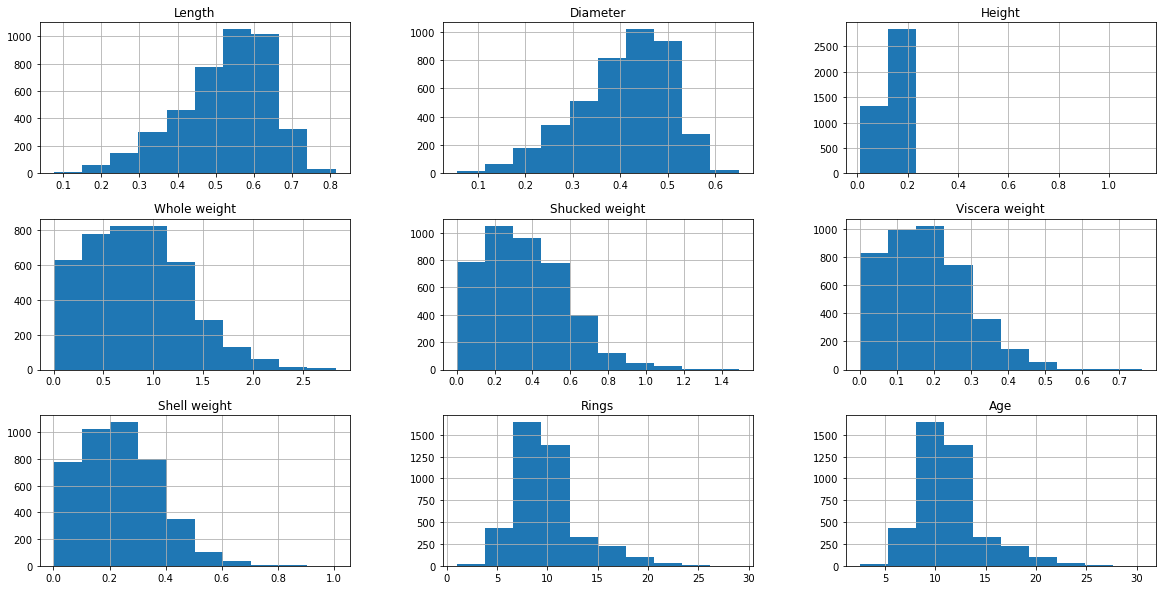

In [9]:
abalone_dataset.hist(figsize=(20,10))

In [10]:
abalone_dataset.skew().sort_values(ascending = False)

C:\Users\jonatas\AppData\Local\Temp/ipykernel_32392/2175815647.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  abalone_dataset.skew().sort_values(ascending = False)


Height            3.166364
Rings             1.113754
Age               1.113754
Shucked weight    0.718735
Shell weight      0.621081
Viscera weight    0.591455
Whole weight      0.530549
Diameter         -0.610182
Length           -0.640993
dtype: float64

In [11]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] 

In [12]:
print("Columns to drop:\n", columns_to_drop)
columns_to_drop.insert(0, 'Sex')

Columns to drop:
 ['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Age']


In [13]:
abalone_dataset.drop(columns_to_drop[:-1], axis=1, inplace=True)

In [14]:
abalone_dataset.head()

,Length,Height,Whole weight,Rings,Age
0,0.455,0.095,0.5140,15,16.5
1,0.350,0.090,0.2255,7,8.5
2,0.530,0.135,0.6770,9,10.5
3,0.440,0.125,0.5160,10,11.5
4,0.330,0.080,0.2050,7,8.5


In [15]:
abalone_dataset['Height'] = np.sqrt(abalone_dataset['Height'])
abalone_dataset.head()

,Length,Height,Whole weight,Rings,Age
0,0.455,0.308221,0.5140,15,16.5
1,0.350,0.300000,0.2255,7,8.5
2,0.530,0.367423,0.6770,9,10.5
3,0.440,0.353553,0.5160,10,11.5
4,0.330,0.282843,0.2050,7,8.5


In [19]:
abalone_dataset['Length'] = np.sqrt(abalone_dataset['Length'])
abalone_dataset.head()

,Length,Height,Whole weight,Rings,Age
0,0.821302,0.308221,0.5140,15,16.5
1,0.769161,0.300000,0.2255,7,8.5
2,0.853236,0.367423,0.6770,9,10.5
3,0.814448,0.353553,0.5160,10,11.5
4,0.757929,0.282843,0.2050,7,8.5


In [17]:
X = abalone_dataset.drop('Age', axis=1)
y = abalone_dataset['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values


print(y_test[0])

print(X_test[0])
classifiers = {
    'LogisiticRegression': LogisticRegression()
}

16.5
[0.55792149 0.43071232 0.15559935 1.5918181 ]


In [18]:
model = LogisticRegression(C=1000, solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

ValueError: Unknown label type: 'continuous'